In [ ]:
$# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face mask.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset extraction is done')

Dataset extraction is done


In [ ]:
!ls

 data  'face mask.zip'	 sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:10])
print(with_mask_files[-10:])

['with_mask_2067.jpg', 'with_mask_1036.jpg', 'with_mask_2785.jpg', 'with_mask_3466.jpg', 'with_mask_3304.jpg', 'with_mask_1144.jpg', 'with_mask_2965.jpg', 'with_mask_317.jpg', 'with_mask_2404.jpg', 'with_mask_2918.jpg']
['with_mask_2293.jpg', 'with_mask_3170.jpg', 'with_mask_532.jpg', 'with_mask_3460.jpg', 'with_mask_3054.jpg', 'with_mask_850.jpg', 'with_mask_2316.jpg', 'with_mask_2329.jpg', 'with_mask_1993.jpg', 'with_mask_3396.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:10])
print(without_mask_files[-10:])

['without_mask_3426.jpg', 'without_mask_2971.jpg', 'without_mask_3758.jpg', 'without_mask_2249.jpg', 'without_mask_2886.jpg', 'without_mask_1525.jpg', 'without_mask_1825.jpg', 'without_mask_1145.jpg', 'without_mask_850.jpg', 'without_mask_999.jpg']
['without_mask_2755.jpg', 'without_mask_1200.jpg', 'without_mask_1616.jpg', 'without_mask_3700.jpg', 'without_mask_3479.jpg', 'without_mask_1501.jpg', 'without_mask_2098.jpg', 'without_mask_416.jpg', 'without_mask_2789.jpg', 'without_mask_1162.jpg']


In [ ]:
print('Mask Images:', len(with_mask_files))
print('Without Mask Images:', len(without_mask_files))

Mask Images: 3725
Without Mask Images: 3828


** Here As I have two class of Image so I am creating a label for it.**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:10])

print(without_mask_labels[0:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

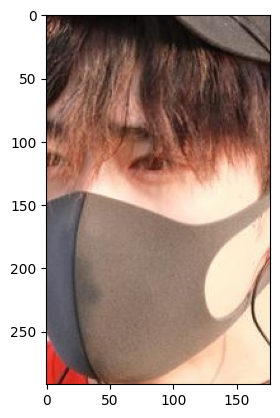

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1525.jpg')
imgplot = plt.imshow(img)
plt.show()

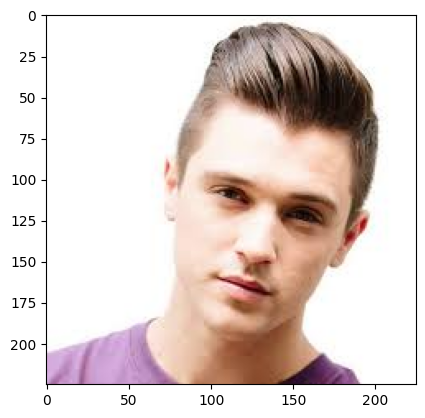

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2825.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[248, 236, 247],
        [246, 238, 244],
        [246, 244, 243],
        ...,
        [247, 246, 244],
        [247, 245, 238],
        [248, 246, 237]],

       [[253, 245, 252],
        [250, 244, 248],
        [248, 248, 245],
        ...,
        [245, 247, 244],
        [246, 248, 243],
        [242, 245, 239]],

       [[251, 244, 249],
        [248, 245, 246],
        [245, 245, 241],
        ...,
        [167, 126, 140],
        [164, 124, 139],
        [166, 126, 141]],

       ...,

       [[245, 239, 240],
        [249, 248, 247],
        [241, 244, 244],
        ...,
        [ 89,  93,  70],
        [ 46,  64,  89],
        [ 59,  57, 101]],

       [[243, 247, 248],
        [245, 249, 251],
        [241, 245, 249],
        ...,
        [ 48,  47,  84],
        [ 47,  54,  84],
        [ 65,  61,  87]],

       [[243, 249, 244],
        [242, 244, 245],
        [247, 245, 251],
        ...,
        [ 56,  59, 100],
        [ 66,  62, 107],
        [ 74,  68,  80]]], dtype=uint8)
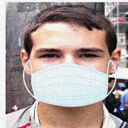

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[235, 186, 127],
        [233, 183, 124],
        [229, 181, 122],
        ...,
        [255, 205,  96],
        [254, 203,  94],
        [252, 201,  91]],

       [[238, 189, 130],
        [236, 186, 127],
        [233, 185, 126],
        ...,
        [254, 202,  95],
        [255, 202,  95],
        [255, 201,  94]],

       [[236, 187, 128],
        [235, 187, 128],
        [234, 188, 129],
        ...,
        [253, 197,  93],
        [250, 194,  90],
        [247, 189,  85]],

       ...,

       [[174,  14,  42],
        [173,  14,  43],
        [174,  13,  44],
        ...,
        [225,  48, 102],
        [228,  53, 102],
        [228,  52,  99]],

       [[174,  14,  42],
        [174,  13,  43],
        [174,  12,  44],
        ...,
        [225,  48, 101],
        [227,  51,  99],
        [228,  52,  98]],

       [[176,  16,  44],
        [177,  16,  46],
        [178,  16,  48],
        ...,
        [229,  52, 105],
        [229,  53, 101],
        [230,  54, 100]]], dtype=uint8)
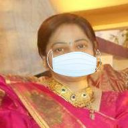

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.92156863, 0.72941176, 0.49803922],
        [0.91372549, 0.71764706, 0.48627451],
        [0.89803922, 0.70980392, 0.47843137],
        ...,
        [1.        , 0.80392157, 0.37647059],
        [0.99607843, 0.79607843, 0.36862745],
        [0.98823529, 0.78823529, 0.35686275]],

       [[0.93333333, 0.74117647, 0.50980392],
        [0.9254902 , 0.72941176, 0.49803922],
        [0.91372549, 0.7254902 , 0.49411765],
        ...,
        [0.99607843, 0.79215686, 0.37254902],
        [1.        , 0.79215686, 0.37254902],
        [1.        , 0.78823529, 0.36862745]],

       [[0.9254902 , 0.73333333, 0.50196078],
        [0.92156863, 0.73333333, 0.50196078],
        [0.91764706, 0.7372549 , 0.50588235],
        ...,
        [0.99215686, 0.77254902, 0.36470588],
        [0.98039216, 0.76078431, 0.35294118],
        [0.96862745, 0.74117647, 0.33333333]],

       ...,

       [[0.68235294, 0.05490196, 0.16470588],
        [0.67843137, 0.05490196, 0.16862745],
        [0.68235294, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 137s 797ms/step - loss: 0.4791 - acc: 0.7870 - val_loss: 0.3029 - val_acc: 0.8645
Epoch 2/5
170/170 [==============================] - 138s 810ms/step - loss: 0.2802 - acc: 0.8924 - val_loss: 0.2308 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 142s 835ms/step - loss: 0.2233 - acc: 0.9193 - val_loss: 0.1925 - val_acc: 0.9256
Epoch 4/5
170/170 [==============================] - 135s 791ms/step - loss: 0.1999 - acc: 0.9297 - val_loss: 0.2087 - val_acc: 0.9174
Epoch 5/5
170/170 [==============================] - 134s 792ms/step - loss: 0.1570 - acc: 0.9434 - val_loss: 0.4244 - val_acc: 0.8512


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 227ms/step - loss: 0.3877 - acc: 0.8643
Test Accuracy = 0.8643282651901245


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming Y_test is one-hot encoded, if not you can convert it using np.argmax(Y_test, axis=1)
Y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

print('Classification Report:')
print(classification_report(Y_test, Y_pred))



48/48 [==============================] - 12s 242ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       768
           1       0.81      0.95      0.87       743

    accuracy                           0.86      1511
   macro avg       0.88      0.87      0.86      1511
weighted avg       0.88      0.86      0.86      1511



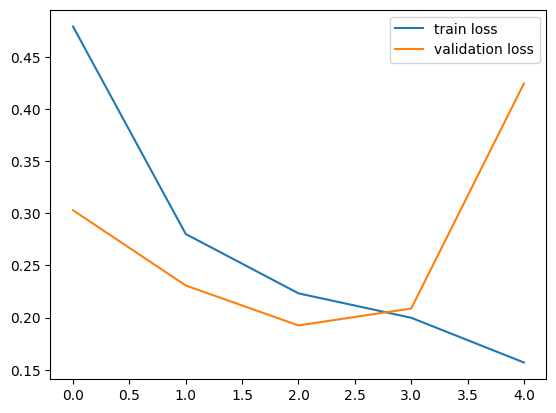

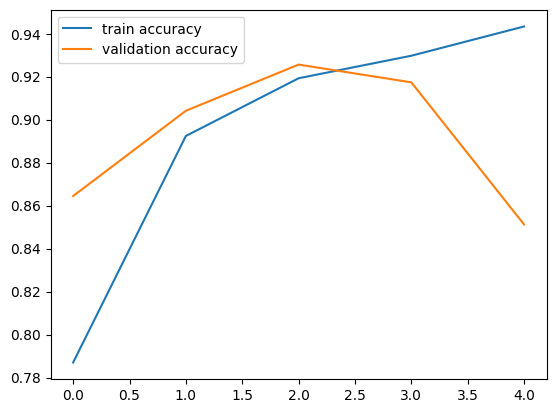

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


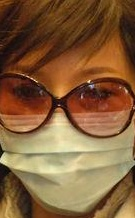

1/1 [==============================] - 0s 135ms/step
[[0.0242453 0.9501094]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']        

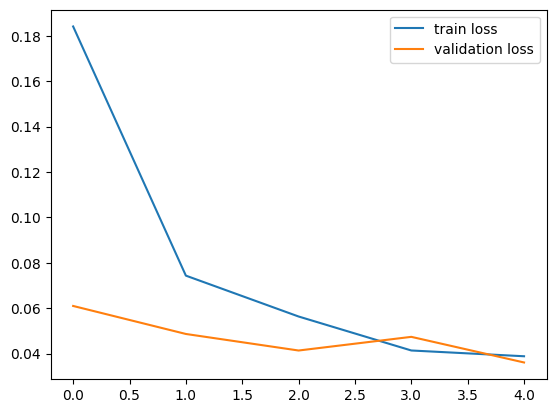

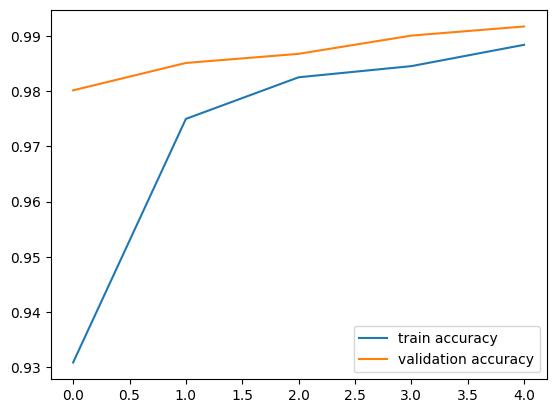

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

import numpy as np
from sklearn.metrics import classification_report

# Define the input shape
input_shape = (128, 128, 3)

# Load MobileNetV2 pre-trained on ImageNet without the top classification layer
base_model = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_of_classes, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)



# Predict on test data
Y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Generate classification report
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


# Plot training history
import matplotlib.pyplot as plt

h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/data/without_mask/without_mask_1004.jpg


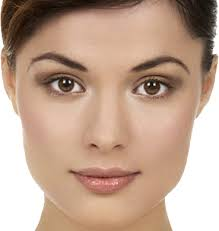

1/1 [==============================] - 1s 1s/step
The person in the image is not wearing a mask


In [ ]:


# Predictive System
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

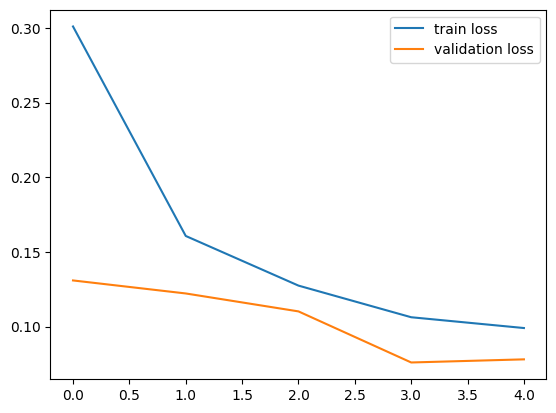

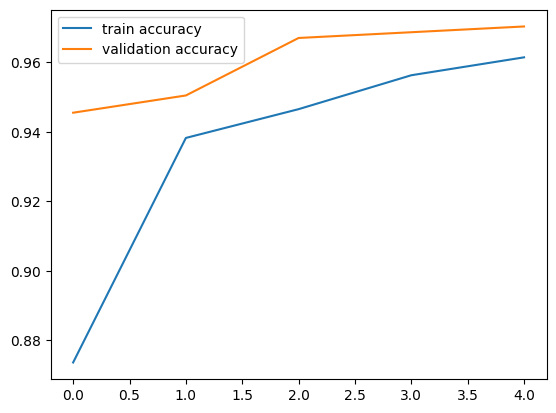

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (128, 128, 3)

# Load VGG16 pre-trained on ImageNet without the top classification layer
base_model = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the VGG16 base model
x = Flatten()(base_model.output)

# Add custom classification head
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_of_classes, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

# Evaluate the model
import numpy as np
from sklearn.metrics import classification_report

# Predict on test data
Y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Generate classification report
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

# Plot training history
import matplotlib.pyplot as plt

h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/data/with_mask/with_mask_1004.jpg


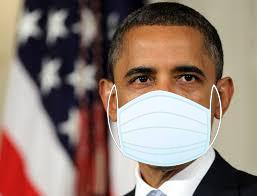

1/1 [==============================] - 0s 381ms/step
The person in the image is wearing a mask


In [ ]:

# Predictive System
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


48/48 [==============================] - 299s 6s/step


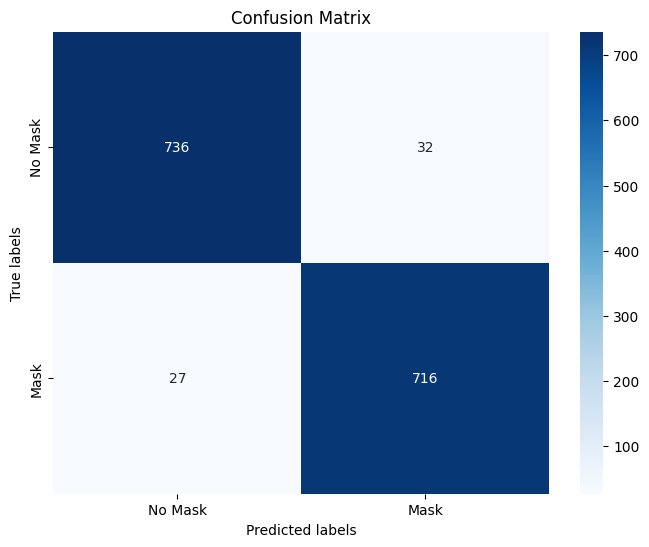

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
Y_pred = np.argmax(model.predict(X_test_scaled), axis=1)


# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


